<hr size="4" color="blue">

<p style="text-align: center;"><span style="color: #0000ff;"><font size="+5"><strong>  Modèles de mélange
     </strong> </font></span> </p>
<hr style="height: 3px; color: #0000ff; width: 50%; border: 1px dashed #000;">

L’objectif de cette séance de TP est de présenter l’utilisation des fonctionnalités de Scikit-learn concernant l’estimation de modèles de mélange, ainsi que de contribuer à une meilleure compréhension de cette méthode et des techniques de choix du nombre de composantes. Pour cela, sont d’abord examinées des données générées de façon contrôlée et ensuite des données réelles vues en cours.

Modèles de mélange gaussiens
La présentation des outils disponibles pour les modèles de mélange se trouve dans http://scikit-learn.org/stable/modules/mixture.html.

La sélection d’un modèle (le choix du nombre de composantes du mélange, mais aussi du type de matrice de covariances entre 'full', 'tied', 'diag', 'spherical', voir plus bas) peut être faite grâce au calcul de Akaike information criterion (AIC) ou de Bayes information criterion (BIC).

Parmi les paramètres, arrêtons-nous aux suivants (regarder la description de l’implémentation pour les autres) :

- n_components : le nombre de composantes du mélange (1 par défaut).
- covariance_type : type de la matrice de covariance employée, choix entre 'full', 'tied', 'diag' et 'spherical', par défaut 'full' ; 'full' = matrice quelconque, 'tied' = matrice quelconque mais identique entre les différentes composantes du mélange, 'diag' = matrice diagonale (variances quelconques mais covariances nulles), 'spherical' = chaque composante a sa propre variance (mais cette valeur est partagée par toutes les variables pour cette composante) et covariances nulles.
- init_params : méthode d’initialisation des paramètres, choix entre 'kmeans' (classification automatique des observations avec K-means, ensuite utilisation de chaque centre de groupe comme moyenne d’une composante du mélange et de la matrice de covariances empiriques du groupe comme matrice de variances-covariances pour cette composante) et 'random' ; par défaut 'kmeans'.
- n_init : nombre d’initialisations (suivies d’exécutions de EM) effectuées ; les meilleurs résultats sont conservés.
Parmi les attributs accessibles nous pouvons mentionner (regardez la documentation pour voir la totalité des attributs) :

- weights_ : les coefficients de mélange (pondérations des différentes composantes du mélange).
- means_ : les moyennes des composantes du mélange.
- covariances_ : les matrices de covariance des composantes du mélange.
- converged_ : True si EM a convergé (dans .fit()), False sinon.
- lower_bound_ : log-vraisemblance atteinte à la fin des itérations par la meilleure exécution de EM.
- Les méthodes qui peuvent être employées :

- fit(X, y=None) : calcul du modèle à partir des observations qui sont les lignes de X.
- aic(X) : valeur du critère d’information de Akaike sur les données de X pour le modèle courant.
- bic(X) : valeur du critère d’information de Bayes sur les données de X pour le modèle courant.
- predict_proba(X) : probabilités a posteriori par rapport à chaque composante du modèle courant pour chaque donnée de X.
- predict(X, y=None) : étiquettes de groupe (classification automatique issue du modèle de mélange grâce aux probabilités a posteriori) obtenues avec le modèle courant pour les données de X.
- sample([n_samples, random_state]) : générer un échantillon (composé de n_samples données) à partir du modèle (pour le moment, accessible seulement pour les noyaux 'gaussian' et 'tophat').
- score(X, y=None) : retourne la log-vraisemblance totale des données de X par rapport au modèle.
- score_samples(X) : retourne le logarithme de la densité calculée pour chaque donnée de X.
- get_params([deep]) : lire les valeurs des paramètres de l’estimateur employé.
- set_params(**params) : donner des valeurs aux paramètres de l’estimateur employé.
Estimation à partir de données générées
Une première utilisation sur des données unidimensionnelles similaires à celles employées pour l’estimation par noyaux (attention, la classe GaussianMixture est disponible à partir de la version 0.18 de Scikit-learn, pour des versions antérieures il faut se servir plutôt de la classe GMM) :

In [26]:
>>> import numpy as np
>>> import matplotlib.pyplot as plt
>>> from scipy.stats import norm
>>> from sklearn.mixture import GaussianMixture

# générer l'échantillon

In [27]:
>>> N = 100
>>> X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
           np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

# préparer les données où on calculera la densité

In [28]:
>>> X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

>>> true_density = (0.3*norm(0,1).pdf(X_plot[:,0]) + 0.7*norm(5,1).pdf(X_plot[:,0]))

In [29]:
# estimation par mélange gaussien, avec le « bon » nombre de composantes
>>> gmm = GaussianMixture(n_components=2,n_init=3).fit(X)
>>> gmm.converged_
True
>>> gmm.lower_bound_

-2.0542795510047216

-...

# calcul de la densité pour les données de X_plot

In [30]:
>>> density = np.exp(gmm.score_samples(X_plot))

# affichage : vraie densité et estimation

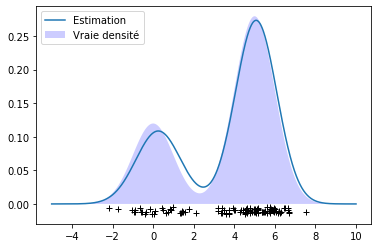

In [31]:
>>> fig = plt.figure()
>>> ax = fig.add_subplot(111)
>>> ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
>>> ax.plot(X_plot[:,0], density, '-', label="Estimation")
>>> ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
>>> ax.legend(loc='upper left')
>>> plt.show()

Question :

Faites varier le nombre de composantes et examinez visuellement les résultats. Regardez les pondérations des composantes et les moyennes de ces composantes. Examinez de quelle manière évolue la valeur finale atteinte par la log-vraisemblance avec le nombre de composantes.

Une utilisation sur des données bidimensionnelles :

# générer l'échantillon

In [32]:
>>> md1 = 1.5 * np.random.randn(200,2) + [3,3]
>>> md2 = np.random.randn(100,2).dot([[2, 0],[0, 0.8]]) + [-3, 3]
>>> md3 = np.random.randn(100,2) + [3, -3]
>>> md = np.concatenate((md1, md2, md3))

# préparer les données où on calculera la densité

In [33]:
>>> grid_size = 100
>>> Gx = np.arange(-10, 10, 20/grid_size)
>>> Gx.shape
(100,)
>>> Gy = np.arange(-10, 10, 20/grid_size)
>>> Gx, Gy = np.meshgrid(Gx, Gy)
>>> Gx.shape
(100, 100)

(100, 100)

# estimation par mélange gaussien

In [34]:
>>> gmm = GaussianMixture(n_components=3,n_init=3).fit(md)
>>> gmm.converged_
>>> gmm.lower_bound_


-4.3538920469361

In [35]:
# calcul de la densité pour les données de la grille
>>> density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

# affichage : données et estimation

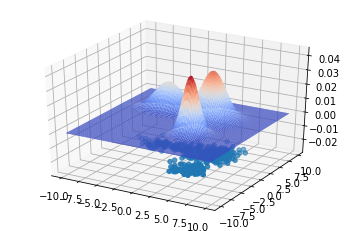

In [36]:
>>> from mpl_toolkits.mplot3d import Axes3D
>>> from matplotlib import cm
>>> fig = plt.figure()
>>> ax = fig.gca(projection='3d')
>>> ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
>>> ax.scatter(md[:,0], md[:,1], -0.025)
>>> plt.show()

Faites varier le nombre de composantes et examinez visuellement les résultats. Examinez de quelle manière évolue la valeur finale atteinte par la log-vraisemblance avec le nombre de composantes.

Correction :

Pour l’examen visuel des résultats il suffit de modifier n_components. Afin de visualiser plusieurs graphiques en même temps il est possible d’utiliser le mode interactif avec plt.ion(). Le programme suivant permet d’afficher les n_max graphiques avec les modèles obtenus, ainsi qu’un graphique avec les valeurs finales de la log-vraisemblance en fonction du nombre de composantes :

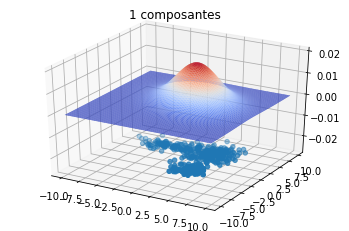

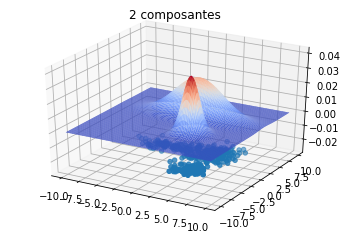

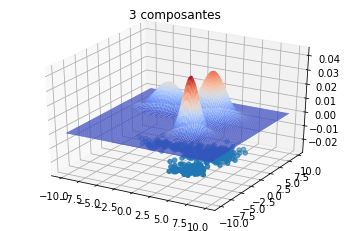

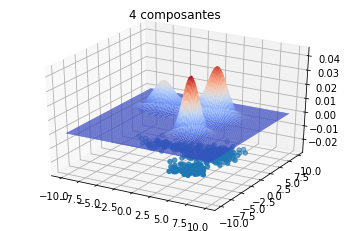

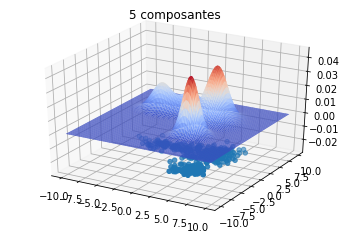

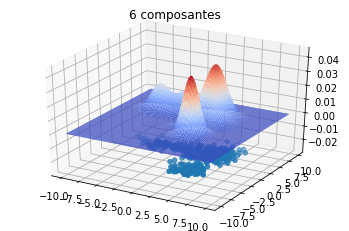

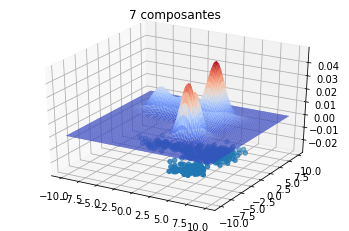

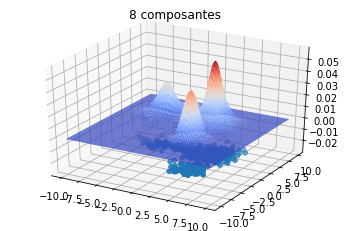

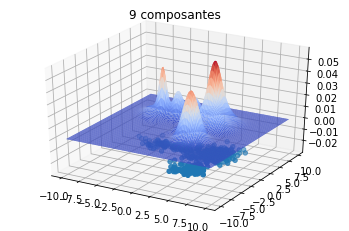

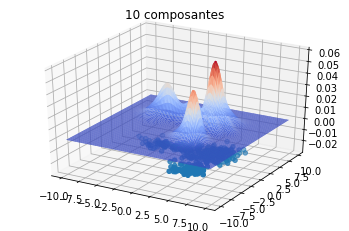

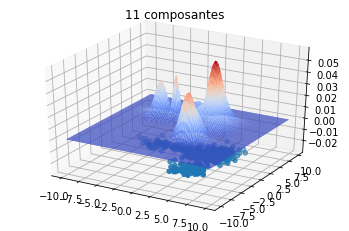

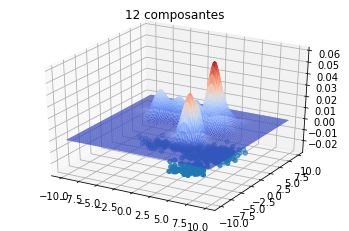

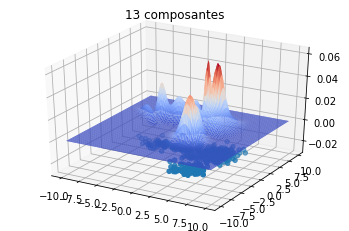

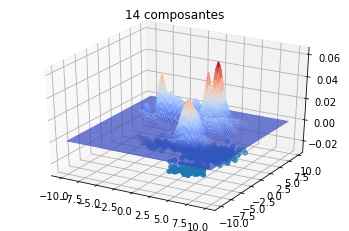

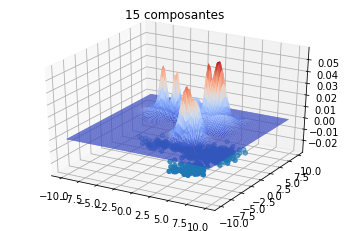

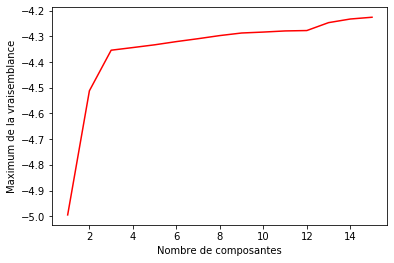

In [37]:
>>> n_max = 15    # nombre de valeurs pour n_components
>>> n_components_range = np.arange(n_max)+1
>>> n_components_range
>>> maxlogv = []
>>> for n_comp in n_components_range:
        gmm = GaussianMixture(n_components=n_comp,n_init=3).fit(md)
        maxlogv.append(gmm.lower_bound_)
        density = np.exp(gmm.score_samples(np.hstack((
                        (Gx.reshape(grid_size*grid_size))[:,np.newaxis],
                        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.set_title(str(n_comp)+' composantes')
        ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size),
                        rstride=1,cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=True)
        ax.scatter(md[:,0], md[:,1], -0.025)

>>> fig = plt.figure()
>>> plt.xlabel('Nombre de composantes')
>>> plt.ylabel('Maximum de la vraisemblance')
>>> plt.plot(n_components_range.tolist(),maxlogv, 'r')
>>> plt.show()

La valeur finale atteinte par la log-vraisemblance augmente avec le nombre de composantes, mais l’augmentation est (très) lente après n_components = 3.

Question :

Générez des données bidimensionnelles suivant une distribution uniforme dans [0,1]2 (données bidimensionelles dans le carré unité). Estimez un mélange gaussien avec 3 composantes, en utilisant n_init = 1. Visualisez les résultats. Utilisez la méthode predict de GaussianMixture pour obtenir des étiquettes de groupe pour les données. Appliquez plusieurs fois de suite la modélisation suivie d’affectation d’étiquettes de groupe et examinez la stabilité des partitionnements en utilisant l’indice de Rand ajusté, comme dans les TP de classification automatique. Attention, vous ne disposez pas de groupes définis au départ ; pour définir les groupes de référence, auxquels vous comparerez ceux issus des autres classifications, vous pouvez appliquer une première fois l’estimation de densité () suivie d’affectation d’étiquettes de groupe avec predict. Que constatez-vous ?

Correction :

In [38]:
>>> from sklearn import metrics

# générer l'échantillon

In [39]:
>>> N = 60
>>> kd = np.random.rand(N, 2)

# définir la grille pour la visualisation

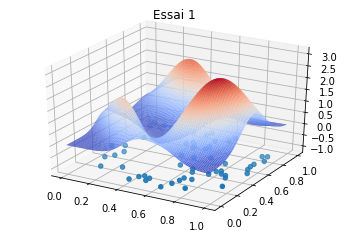

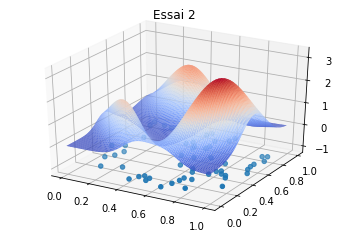

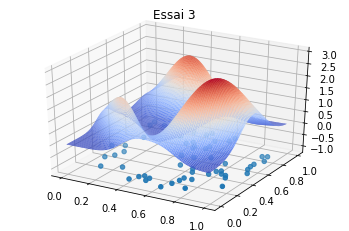

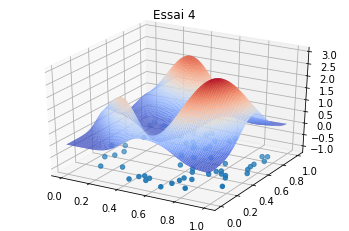

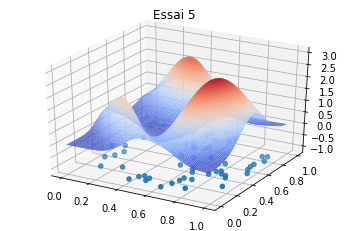

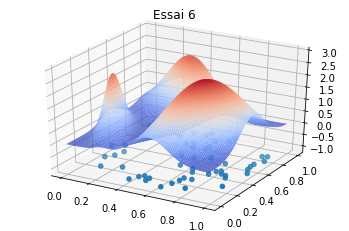

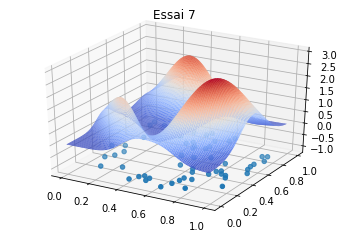

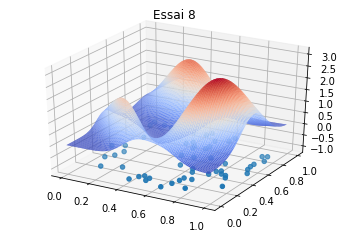

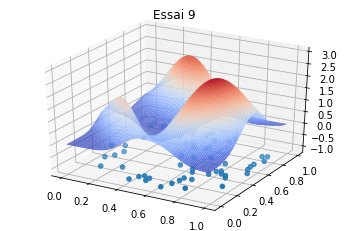

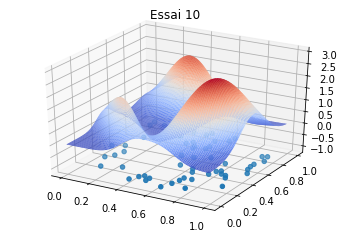

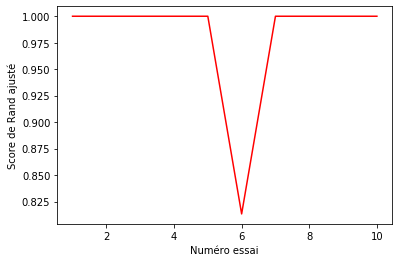

In [40]:
>>> grid_size = 100
>>> Gx = np.arange(0, 1, 1/grid_size)
>>> Gy = np.arange(0, 1, 1/grid_size)
>>> Gx, Gy = np.meshgrid(Gx, Gy)

>>> gmm = GaussianMixture(n_components=3).fit(kd)
>>> clust = gmm.predict(kd)
>>> n_max = 10    # nombre d'essais
>>> n_essais_range = np.arange(n_max)+1
>>> arm = []
>>> for i in n_essais_range:
        gmm = GaussianMixture(n_components=3).fit(kd)
        arm.append(metrics.adjusted_rand_score(clust, gmm.predict(kd)))
        density = np.exp(gmm.score_samples(np.hstack((
                        (Gx.reshape(grid_size*grid_size))[:,np.newaxis],
                        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.set_title('Essai '+str(i))
        ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1,
                     cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
        ax.scatter(kd[:,0], kd[:,1], -1.0)

>>> fig = plt.figure()
>>> plt.xlabel('Numéro essai')
>>> plt.ylabel('Score de Rand ajusté')
>>> plt.plot(n_essais_range.tolist(),arm, 'r')
>>> plt.show()

Choix du nombre de composantes et du type de matrice de covariances pour les données générées
Pour choisir le nombre de composantes du mélange, nous comparerons d’abord les critères AIC et BIC en utilisant des matrices de covariance 'full' (par défaut). Sur les données bidimensionnelles générées :

In [42]:
>>> n_max = 8    # nombre de valeurs pour n_components
>>> n_components_range = np.arange(n_max)+1
>>> aic = []
>>> bic = []

# construction des modèles et calcul des critères

In [43]:
>>> for n_comp in n_components_range:
>>>     gmm = GaussianMixture(n_components=n_comp).fit(md)
>>>     aic.append(gmm.aic(md))
>>>     bic.append(gmm.bic(md))

>>> aic
[...]
>>> bic
[...]

[Ellipsis]

# normalisation des résultats obtenus pour les critères

In [44]:
>>> raic = aic/np.max(aic)
>>> rbic = bic/np.max(bic)

# affichage sous forme de barres

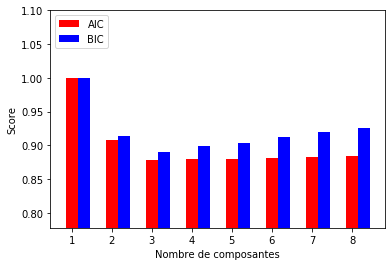

In [45]:
>>> xpos = np.arange(n_max)+1  # localisation des barres
>>> largeur = 0.3              # largeur des barres
>>> fig = plt.figure()
>>> plt.ylim([min(np.concatenate((rbic,raic)))-0.1, 1.1])
>>> plt.xlabel('Nombre de composantes')
>>> plt.ylabel('Score')
>>> plt.bar(xpos, raic, largeur, color='r', label="AIC")
>>> plt.bar(xpos+largeur, rbic, largeur, color='b', label="BIC")
>>> plt.legend(loc='upper left')
>>> plt.show()

Pour ces données et avec des matrices de covariances 'full', à la fois AIC et BIC permettent de privilégier l’utilisation de 3 composants, nombre égal à celui de lois normales qui ont permis de générer les données.

Question :

Réalisez la même comparaison pour ces données avec des matrices de covariances 'diag'.

Question :

Ajoutez sur le même graphique (adapté) les valeurs normalisées de la log-vraisemblance finale pour chaque valeur de n_components.

Correction :

In [47]:
>>> n_max = 8    # nombre de valeurs pour n_components
>>> n_components_range = np.arange(n_max)+1
>>> aic = []
>>> bic = []
>>> maxlogv = []
>>> for n_comp in n_components_range:
        gmm = GaussianMixture(n_components=n_comp).fit(md)
        aic.append(gmm.aic(md))
        bic.append(gmm.bic(md))
        maxlogv.append(gmm.lower_bound_)

# normalisation des résultats obtenus pour les critères

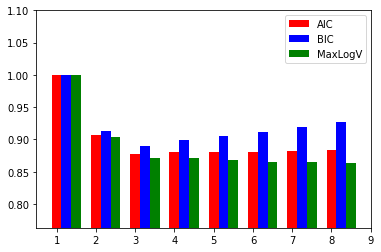

In [48]:
>>> raic = aic/np.max(aic)
>>> rbic = bic/np.max(bic)
>>> rmaxlogv = maxlogv/np.min(maxlogv)

>>> xpos = np.arange(n_max)+1  # localisation des barres
>>> largeur = 0.25             # largeur des barres
>>> fig = plt.figure()
>>> plt.ylim([min(np.concatenate((rbic,raic,rmaxlogv)))-0.1, 1.1])
>>> plt.bar(xpos, raic, largeur, color='r', label="AIC")
>>> plt.bar(xpos+largeur, rbic, largeur, color='b', label="BIC")
>>> plt.bar(xpos+largeur+largeur, rmaxlogv, largeur, color='g', label="MaxLogV")
>>> plt.legend(loc='upper right')
>>> plt.show()

Estimation à partir des données « textures »
Nous appliquerons l’estimation de densité par mélange gaussien aux données « textures » projetées sur les deux premiers axes principaux.

# lecture des données et aplication de l'ACP

In [72]:
>>> from sklearn.decomposition import PCA
>>> textures = np.loadtxt('texture.dat')
>>> pca = PCA().fit(textures[:,:40])
>>> texturesp = pca.transform(textures[:,:40])

In [73]:
texturesp

array([[-1.16155229e+00,  1.82244477e-01, -2.18123363e-01, ...,
        -3.15451085e-17,  2.25459110e-17, -4.40536977e-17],
       [-2.16050064e+00,  1.17288710e-01, -5.08043163e-01, ...,
        -7.61826011e-17,  6.24707346e-17,  4.96445029e-17],
       [-2.70784962e-01,  1.16573323e-01, -1.50977202e-01, ...,
        -5.27012177e-17, -4.84607652e-17,  6.11879671e-17],
       ...,
       [ 1.06487356e+00, -3.35878379e-01, -5.67422091e-01, ...,
         2.94377217e-17, -1.75404075e-16,  6.91179505e-17],
       [ 1.42495239e-01,  1.03743672e-02, -8.26323787e-02, ...,
         8.11017015e-18, -1.66636331e-17, -1.55635521e-16],
       [ 1.11138813e+00,  4.36353451e-01,  3.03466244e-01, ...,
         8.72808343e-18,  2.61585817e-17, -1.21741386e-16]])

# construction du modèle de mélange, vérifications

In [74]:
>>> gmm = GaussianMixture(n_components=11,n_init=3).fit(texturesp[:,:2])
>>> gmm.converged_
>>> gmm.n_iter_
>>> gmm.lower_bound_

-1.7761604064368155

# préparer les données où on calculera la densité

In [75]:
>>> grid_size = 100
>>> xmin = 1.3*np.min(texturesp[:,0])
>>> xmax = 1.3*np.max(texturesp[:,0])
>>> Gx = np.arange(xmin, xmax, (xmax-xmin)/grid_size)
>>> ymin = 1.3*np.min(texturesp[:,1])
>>> ymax = 1.3*np.max(texturesp[:,1])
>>> Gy = np.arange(ymin, ymax, (ymax-ymin)/grid_size)
>>> Gx, Gy = np.meshgrid(Gx, Gy)

# calcul de la densité pour les données de la grille

In [76]:
>>> density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

# affichage des résultats

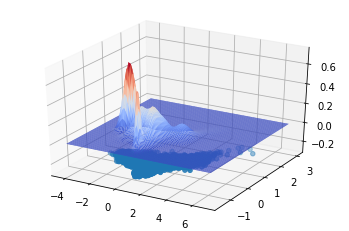

In [77]:
>>> from mpl_toolkits.mplot3d import Axes3D
>>> from matplotlib import cm
>>> fig = plt.figure()
>>> ax = fig.gca(projection='3d')
>>> ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
>>> ax.scatter(texturesp[:,0], texturesp[:,1], -0.25)
>>> plt.show()

Question :

Appliquez l’estimation de densité par mélange gaussien sur les données « textures » projetées sur les deux premiers axes discriminants.

Correction :

# lecture des données

In [78]:
>>> textures = np.loadtxt('texture.dat')
>>> from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
>>> lda = LinearDiscriminantAnalysis(n_components=2)
>>> lda.fit(textures[:,:40],textures[:,40])
>>> texturest = lda.transform(textures[:,:40])
>>> texturest.shape

(5500, 2)

(5500, 2)

# construction du modèle de mélange, vérifications

In [79]:
>>> gmm = GaussianMixture(n_components=11,n_init=3).fit(texturest[:,:2])

# définir la grille pour la visualisation

In [80]:
>>> grid_size = 100
>>> mx = min(texturest[:,0])
>>> Mx = max(texturest[:,0])
>>> my = min(texturest[:,1])
>>> My = max(texturest[:,1])
>>> xstep = (Mx - mx) / grid_size
>>> ystep = (My - my) / grid_size
>>> Gx = np.arange(mx, Mx, xstep)
>>> Gy = np.arange(my, My, ystep)
>>> Gx, Gy = np.meshgrid(Gx, Gy)

# calcul de la densité pour les données de la grille

In [81]:
>>> density = np.exp(gmm.score_samples(np.hstack((
                    (Gx.reshape(grid_size*grid_size))[:,np.newaxis],
                    (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

# affichage des résultats

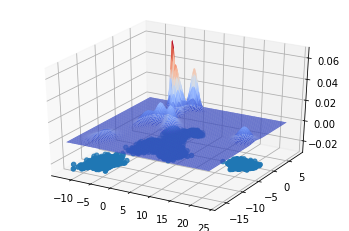

In [82]:
>>> from mpl_toolkits.mplot3d import Axes3D
>>> from matplotlib import cm
>>> fig = plt.figure()
>>> ax = fig.gca(projection='3d')
>>> ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
>>> ax.scatter(texturest[:,0], texturest[:,1], -0.025)
>>> plt.show()

Choix du nombre de composantes et du type de matrice de covariances pour les données « textures »
Déterminons d’abord le meilleur nombre de composantes en utilisant les critères AIC et BIC pour les projections de ces données sur les deux premiers axes principaux :

In [83]:
>>> n_max = 8    # nombre de valeurs pour n_components
>>> n_components_range = np.arange(n_max)+6
>>> n_components_range

array([ 6,  7,  8,  9, 10, 11, 12, 13])

In [84]:
>>> aic = []
>>> bic = []

# construction des modèles et calcul des critères

In [85]:
texturesp

array([[-1.16155229e+00,  1.82244477e-01, -2.18123363e-01, ...,
        -3.15451085e-17,  2.25459110e-17, -4.40536977e-17],
       [-2.16050064e+00,  1.17288710e-01, -5.08043163e-01, ...,
        -7.61826011e-17,  6.24707346e-17,  4.96445029e-17],
       [-2.70784962e-01,  1.16573323e-01, -1.50977202e-01, ...,
        -5.27012177e-17, -4.84607652e-17,  6.11879671e-17],
       ...,
       [ 1.06487356e+00, -3.35878379e-01, -5.67422091e-01, ...,
         2.94377217e-17, -1.75404075e-16,  6.91179505e-17],
       [ 1.42495239e-01,  1.03743672e-02, -8.26323787e-02, ...,
         8.11017015e-18, -1.66636331e-17, -1.55635521e-16],
       [ 1.11138813e+00,  4.36353451e-01,  3.03466244e-01, ...,
         8.72808343e-18,  2.61585817e-17, -1.21741386e-16]])

In [86]:
>>> for n_comp in n_components_range:
        gmm = GaussianMixture(n_components=n_comp).fit(texturesp[:,:2])
        aic.append(gmm.aic(texturesp[:,:2]))
        bic.append(gmm.bic(texturesp[:,:2]))

# normalisation des résultats obtenus pour les critères

In [87]:
>>> raic = aic/np.max(aic)
>>> rbic = bic/np.max(bic)

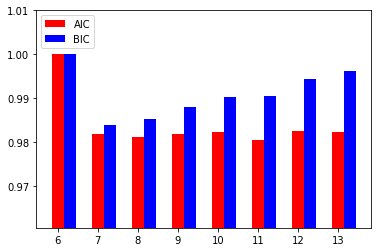

In [89]:
# affichage sous forme de barres
>>> xpos = n_components_range  # localisation des barres
>>> largeur = 0.3              # largeur des barres
>>> fig = plt.figure()
>>> plt.ylim([min(np.concatenate((rbic,raic)))-0.02, 1.01])
>>> plt.bar(xpos, raic, largeur, color='r', label="AIC")
>>> plt.bar(xpos+largeur, rbic, largeur, color='b', label="BIC")
>>> plt.legend(loc='upper left')
>>> plt.show()

Comment expliquez-vous que la valeur optimale obtenue avec BIC pour n_components soit inférieure au nombre de classes de textures (qui est de 11) ?

Question :

Réalisez la même étude en utilisant plutôt les projections des données « textures » sur les deux premiers axes discriminants. Comment expliquez-vous la différence par rapport au cas précédent ?